Shylee Oler - Analysis on Mushrooms from the Audobon Society Field Guide

Dataset: https://archive.ics.uci.edu/dataset/73/mushroom

The dataset consists of various features describing mushrooms, including physical attributes and habitat, with the target variable indicating whether each mushroom is edible or poisonous. Here's a breakdown of the columns:

    class: Edibility of the mushroom (e: edible, p: poisonous)
    cap-shape: Shape of the mushroom cap (b: bell, x: convex, s: sunken, f: flat, etc.)
    cap-surface: Surface of the mushroom cap (f: fibrous, y: scaly, s: smooth, g: grooves)
    cap-color: Color of the mushroom cap (n: brown, y: yellow, w: white, etc.)
    bruises: Presence of bruises (t: bruises present, f: no bruises)
    odor: Odor of the mushroom (a: almond, l: anise, n: none, p: pungent, etc.)
    gill-attachment: Attachment of gills to the stalk (f: free, a: attached)
    gill-spacing: Spacing between gills (c: close, w: crowded)
    gill-size: Size of the gills (b: broad, n: narrow)
    gill-color: Color of the gills (k: black, n: brown, w: white, etc.)
    stalk-shape: Shape of the stalk (e: enlarging, t: tapering)
    stalk-root: Root of the stalk (b: bulbous, c: club, u: cup, etc.)
    stalk-surface-above-ring: Surface texture of the stalk above the ring (s: smooth, f: fibrous, k: silky, y: scaly)
    stalk-surface-below-ring: Surface texture of the stalk below the ring (s: smooth, f: fibrous, y: scaly, k: silky)
    stalk-color-above-ring: Color of the stalk above the ring (n: brown, w: white, p: pink, etc.)
    stalk-color-below-ring: Color of the stalk below the ring (n: brown, w: white, p: pink, etc.)
    veil-type: Type of veil (p: partial, u: universal)
    veil-color: Color of the veil (w: white, y: yellow)
    ring-number: Number of rings (n: none, o: one, t: two)
    ring-type: Type of ring (c: cobwebby, e: evanescent, f: flaring, l: large, n: none, p: pendant, s: sheathing, z: zone)
    spore-print-color: Color of the spore print (k: black, n: brown, w: white, etc.)
    population: Population of mushrooms (a: abundant, c: clustered, n: numerous, s: scattered, v: several, y: solitary)
    habitat: Habitat of mushrooms (g: grasses, l: leaves, m: meadows, p: paths, u: urban, w: waste, d: woods)


In [1]:
#Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression


In [2]:
# Load the dataset from file
file_path = "Data/agaricus-lepiota.data"
column_names = ['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment',
                'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
                'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type',
                'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']
df = pd.read_csv(file_path, header=None, names=column_names)

NOTE: 0 indicates edible
1 indicates poisonous
Logistic Regression:
Training Accuracy: 0.9572241883366672
Test Accuracy: 0.952
              precision    recall  f1-score   support

           0       0.96      0.95      0.95       843
           1       0.94      0.96      0.95       782

    accuracy                           0.95      1625
   macro avg       0.95      0.95      0.95      1625
weighted avg       0.95      0.95      0.95      1625


Support Vector Machine:
Training Accuracy: 0.9879981535620864
Test Accuracy: 0.9876923076923076
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       843
           1       0.98      1.00      0.99       782

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625


Cross-validation scores:
Logistic Regression: 0.8301108753315649
Support Vector Machine: 0.8717180750284198


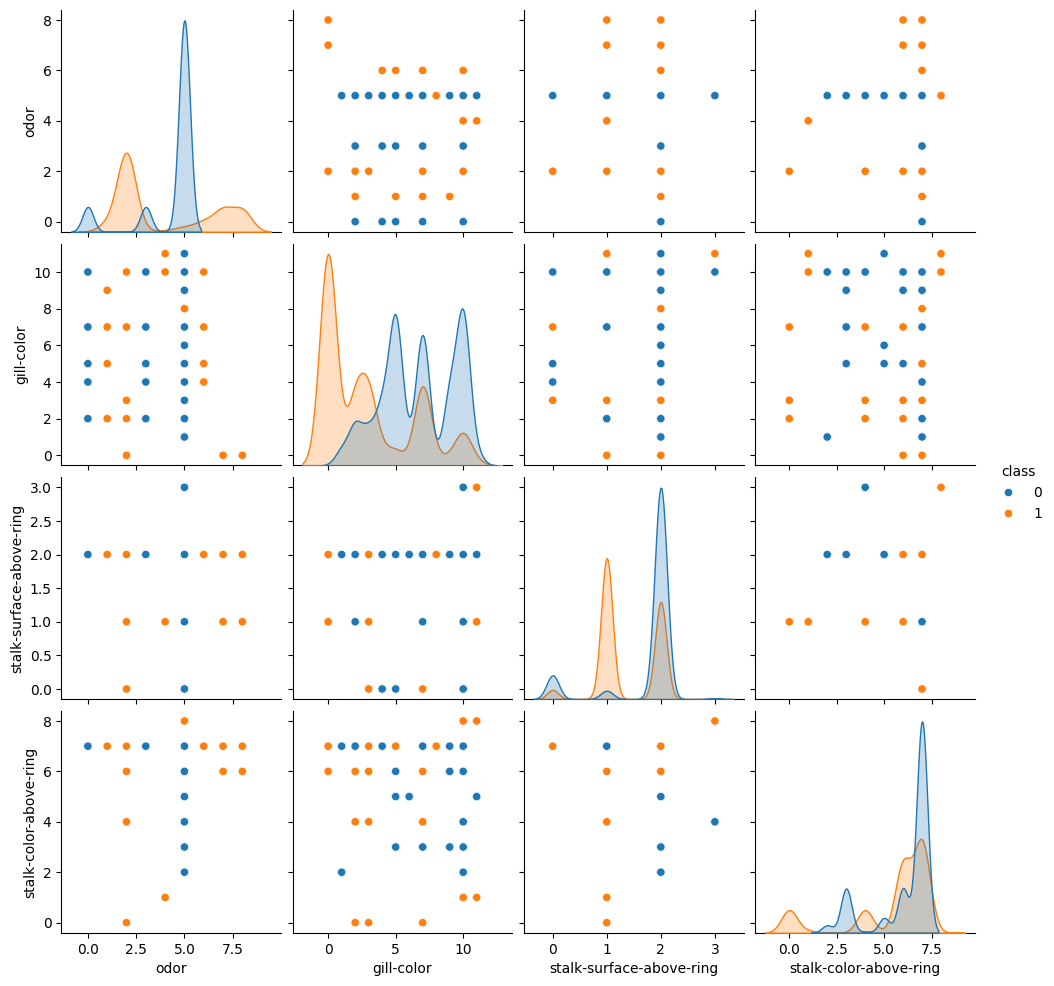

In [3]:
# Data preprocessing
# Encode categorical variables
label_encoders = {}
for column in df.columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

# Split data into features and target variable
X = df.drop('class', axis=1)
y = df['class']
lm = LinearRegression()
lm.fit(X, y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train_scaled, y_train)

# Support Vector Machine model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_scaled, y_train)

# Model evaluation
print("NOTE: 0 indicates edible, 1 indicates poisonous\n")
print("Logistic Regression:")
print("Training Accuracy:", logistic_model.score(X_train_scaled, y_train))
print("Test Accuracy:", logistic_model.score(X_test_scaled, y_test))
print(classification_report(y_test, logistic_model.predict(X_test_scaled)))

print("\nSupport Vector Machine:")
print("Training Accuracy:", svm_model.score(X_train_scaled, y_train))
print("Test Accuracy:", svm_model.score(X_test_scaled, y_test))
print(classification_report(y_test, svm_model.predict(X_test_scaled)))

# Cross-validation
logistic_cv_score = cross_val_score(logistic_model, X, y, cv=5)
svm_cv_score = cross_val_score(svm_model, X, y, cv=5)
print("\nCross-validation scores:")
print("Logistic Regression:", logistic_cv_score.mean())
print("Support Vector Machine:", svm_cv_score.mean())

# Plot selected pairs of variables
sns.pairplot(df[['class', 'odor', 'gill-color', 'stalk-surface-above-ring', 'stalk-color-above-ring']], hue='class')
plt.show()